<a href="https://colab.research.google.com/github/jjkind/colab-rnn/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
#Load data
mnist = tf.keras.datasets.mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']);

In [13]:
#Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10);

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2937 - accuracy: 0.9149 - val_loss: 0.1449 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1439 - accuracy: 0.9575 - val_loss: 0.1067 - val_accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1061 - accuracy: 0.9672 - val_loss: 0.0898 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0881 - accuracy: 0.9730 - val_loss: 0.0819 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0775 - accuracy: 0.9761 - val_loss: 0.0716 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0678 - accuracy: 0.9781 - val_loss: 0.0741 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0576 - accuracy: 0.9813 - val_loss: 0.0735 - val_acc

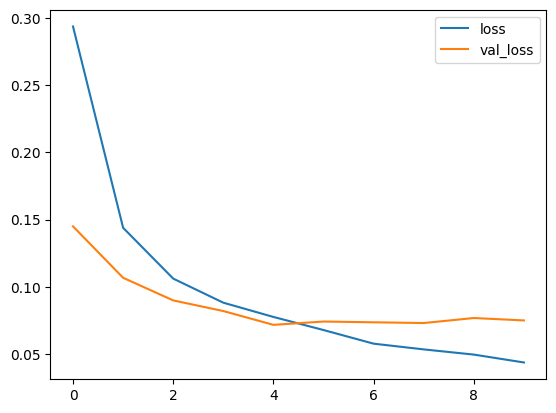

In [14]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

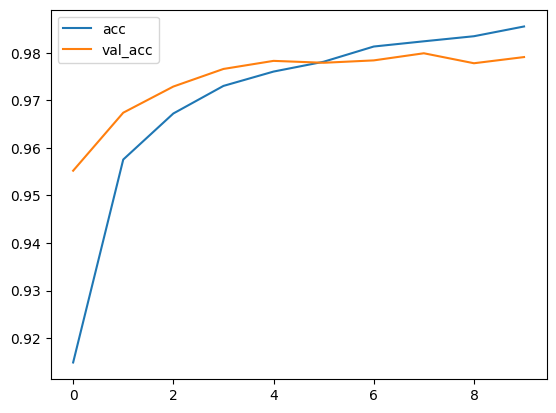

In [15]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
#Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.0749 - accuracy: 0.9791
[0.07492820173501968, 0.9790999889373779]


In [18]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  #This function prints and plots the confusion matrix
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

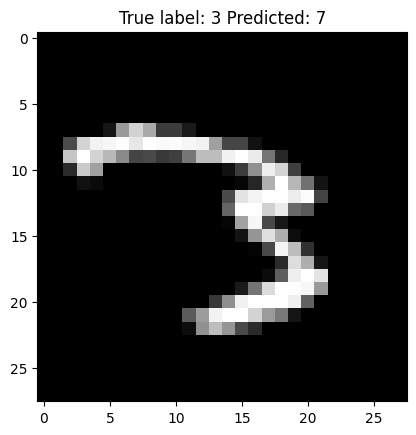

In [22]:
#Show misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));